<a href="https://colab.research.google.com/github/Tamilpriyan-MT/GenAI_LLM/blob/main/Transformers_lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

text = "I love using transformers for NLP tasks!"

result = classifier(text)

print(result)


Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9982925057411194}]


In [ ]:
!pip install transformers torch


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
# Input text
text = "Transformers are amazing for NLP!"

# Tokenize input
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Get model output
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

predictions = torch.argmax(logits, dim=-1)
print("Predicted class:", predictions.item())

# Logits output (before applying softmax)
print(logits)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted class: 1
tensor([[-0.1850, -0.0974]])


In [ ]:
from transformers import AutoModelForMaskedLM,AutoTokenizer
import torch



# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("google-bert/bert-base-uncased")
# Input text
text = "Transformers are amazing for NLP!"

# Tokenize input
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Get model output
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

predicted_token_id = torch.argmax(logits[0,0]).item()
print("Predicted Token ID:", predicted_token_id)
predicted_token=tokenizer.decode([predicted_token_id])
print("Predicted token:",predicted_token)
predictions = torch.argmax(logits, dim=-1)



Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Predicted Token ID: 1012
Predicted token: .


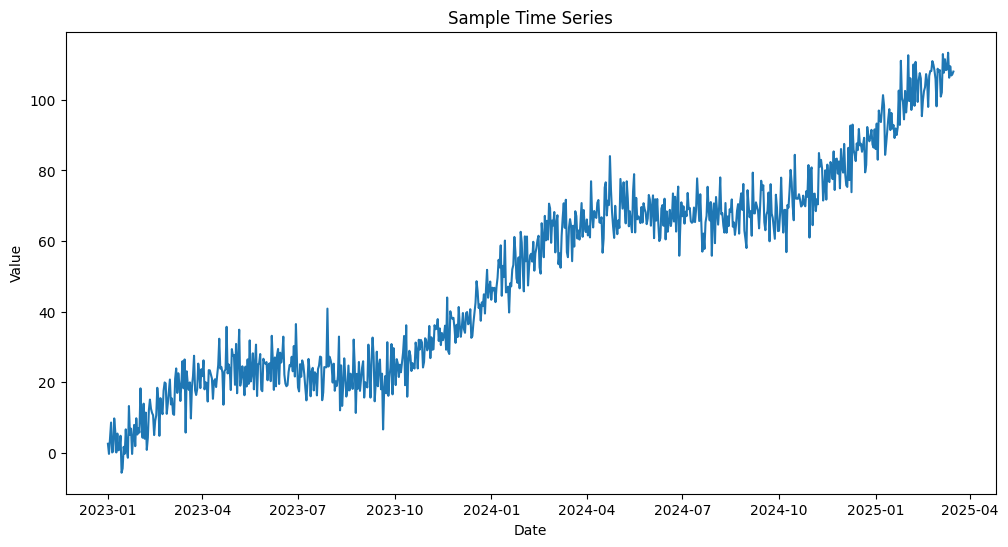

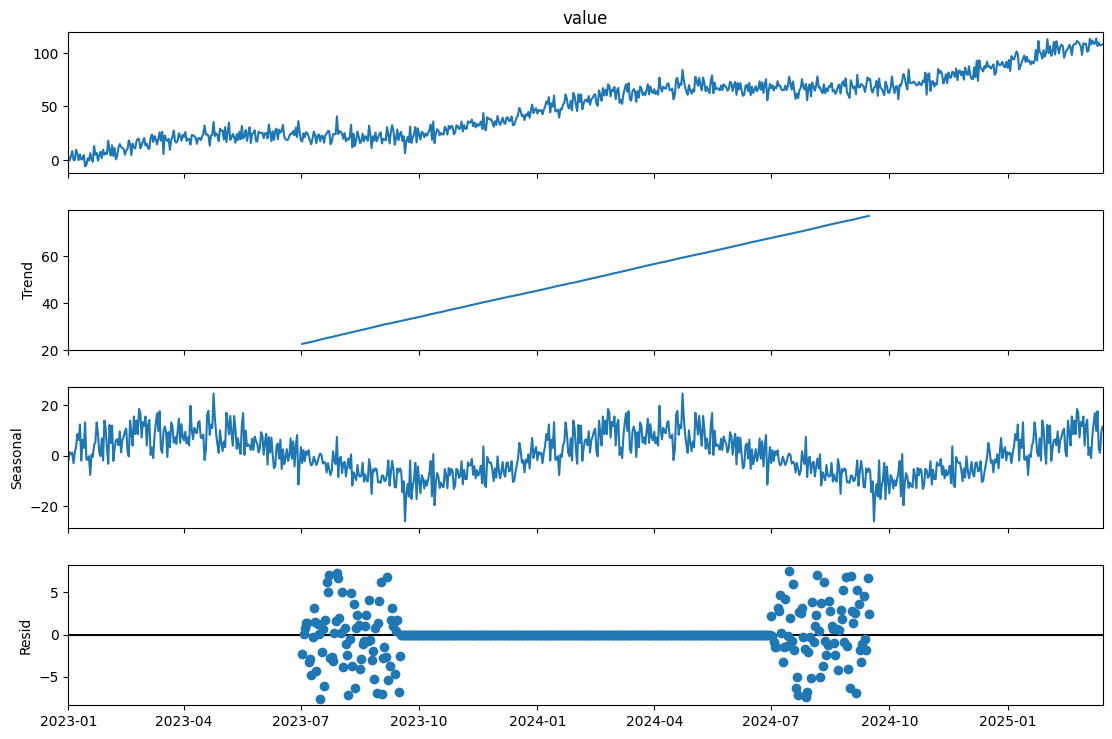

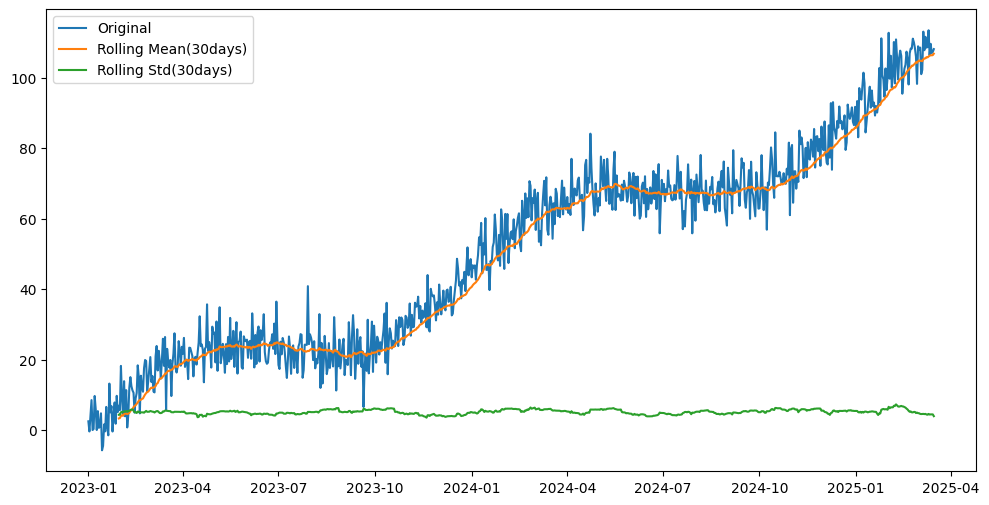

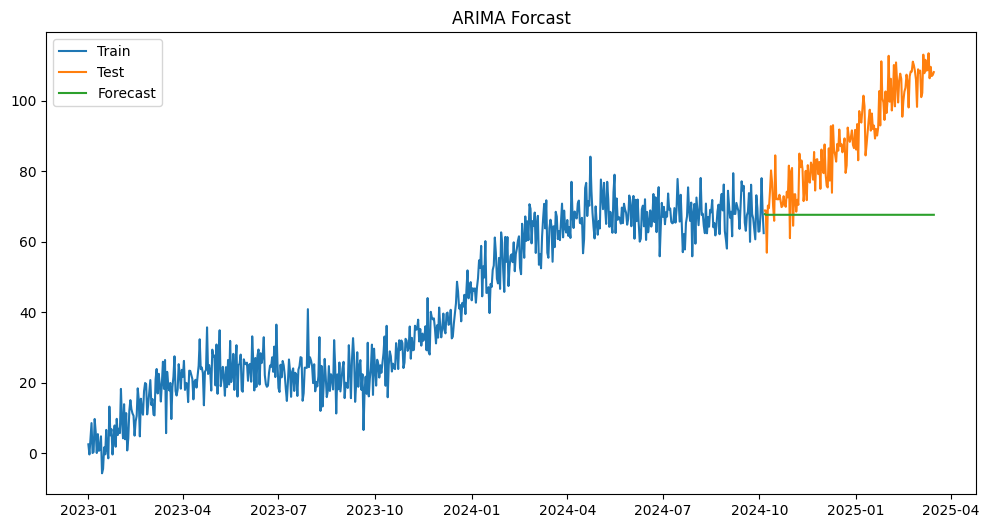

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  644
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1974.347
Date:                Mon, 17 Mar 2025   AIC                           3954.694
Time:                        06:42:23   BIC                           3968.093
Sample:                    01-01-2023   HQIC                          3959.894
                         - 10-05-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0381      0.048     -0.796      0.426      -0.132       0.056
ma.L1         -0.8465      0.025    -33.875      0.000      -0.895      -0.797
sigma2        27.1427      1.503     18.063      0.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2025-03-16', freq="D")
n = len(dates)

trend = np.linspace(0, 100, n)
seasonality = 10 * np.sin(2 * np.pi * np.arange(n) / 365)
noise = np.random.normal(0, 5, n)
data = trend + seasonality + noise
ts_df = pd.DataFrame(data, index=dates, columns=['value'])

# Plot the Time Series Data
plt.figure(figsize=(12, 6))
plt.plot(ts_df)
plt.title("Sample Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

#Time Series Decompostions
decomposition = seasonal_decompose(ts_df['value'],model='additive',period=365)
fig = decomposition.plot()
fig.set_size_inches(12,8)
plt.show()

#Rolling Statistics
window_size = 30
rolling_mean = ts_df['value'].rolling(window=window_size).mean()
rolling_std = ts_df['value'].rolling(window=window_size).std()
plt.figure(figsize=(12,6))
plt.plot(ts_df['value'],label='Original')
plt.plot(rolling_mean,label=f'Rolling Mean({window_size}days)')
plt.plot(rolling_std,label=f'Rolling Std({window_size}days)')

plt.legend()
plt.show()

train_size=int(len(ts_df)*0.8)
train,test=ts_df.iloc[:train_size],ts_df.iloc[train_size:]
model=ARIMA(train['value'],order=(1,1,1))
results=model.fit()

forecast=results.forecast(steps=len(test))
plt.figure(figsize=(12,6))
plt.plot(train['value'],label='Train')
plt.plot(test['value'],label='Test')
plt.plot(forecast,label='Forecast')
plt.legend()
plt.title('ARIMA Forcast')
plt.show()

print(results.summary())






**bold text**

In [ ]:
# 1.Input
# 2.Memory
# 3.forgotten memory

In [ ]:
!pip install translate


In [ ]:
import streamlit as st
from streamlit_option_menu import option_menu
import requests
import json
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from translate import Translator

# Define Ollama API URL
OLLAMA_URL = "http://localhost:11434/api/generate"

# Function to translate text
def translate_text(text, lang='en'):
    translator = Translator(to_lang=lang)
    return translator.translate(text)

# Function to generate recommendations
def generate_recommendation(N, P, K, temp, humidity, ph, rainfall, pest_status, crop):
    recs = [f"Recommended Crop: {crop}"]

    if N < 50:
        recs.append("Add Nitrogen-rich fertilizer")
    if P < 40:
        recs.append("Add Phosphorus-rich fertilizer")
    if K < 40:
        recs.append("Add Potassium-rich fertilizer")
    if temp < 20:
        recs.append("Temperature is too low, consider greenhouse methods")
    if humidity < 60:
        recs.append("Increase irrigation to maintain humidity")
    if ph < 6.0:
        recs.append("Add lime to balance pH")
    if rainfall < 100:
        recs.append("Ensure additional irrigation")
    if pest_status:
        recs.append("Use organic pesticide")

    return recs

# Load or train the model
try:
    with open('crop_model.pkl', 'rb') as f:
        model = pickle.load(f)
except FileNotFoundError:
    # Load dataset
    data = pd.read_csv('data/crop_recommendation.csv')

    # Extract features and labels
    X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    y = data['label']

    # Train the RandomForest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Save trained model
    with open('crop_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Streamlit UI
st.title("Crop Recommendation System")

# Sidebar menu
with st.sidebar:
    selected = option_menu(
        menu_title="Main Menu",
        options=["Home", "Recommendation", "About"],
        icons=["house", "list-task", "info-circle"],
        menu_icon="menu-button-wide",
        default_index=0
    )

if selected == "Home":
    st.write("Welcome to the Crop Recommendation System!")

elif selected == "Recommendation":
    st.subheader("Enter Soil & Weather Parameters")

    # Input fields
    N = st.number_input("Nitrogen (N)", min_value=0, max_value=100, step=1)
    P = st.number_input("Phosphorus (P)", min_value=0, max_value=100, step=1)
    K = st.number_input("Potassium (K)", min_value=0, max_value=100, step=1)
    temperature = st.number_input("Temperature (°C)", min_value=0.0, max_value=50.0, step=0.1)
    humidity = st.number_input("Humidity (%)", min_value=0.0, max_value=100.0, step=0.1)
    ph = st.number_input("Soil pH", min_value=0.0, max_value=14.0, step=0.1)
    rainfall = st.number_input("Rainfall (mm)", min_value=0.0, max_value=500.0, step=0.1)
    pest_status = st.checkbox("Pest detected?")

    # Predict & Recommend
    if st.button("Get Recommendation"):
        input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
        predicted_crop = model.predict(input_data)[0]
        recommendations = generate_recommendation(N, P, K, temperature, humidity, ph, rainfall, pest_status, predicted_crop)

        st.success(f"Recommended Crop: {predicted_crop}")
        st.write("**Additional Recommendations:**")
        for rec in recommendations:
            st.write("- " + rec)

elif selected == "About":
    st.write("This is a machine learning-based crop recommendation system.")


FileNotFoundError: [Errno 2] No such file or directory: 'data/crop_recommendation.csv'

In [ ]:
 import streamlit as st
from streamlit_option_menu import option_menu
import requests
import json
import pandas as pd
import numpy as np
import pickle
from translate import Translator
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Configuration for the Chatbot
OLLAMA_URL = "http://localhost:11434/api/generate"

# Translation function
def translate_text(text, lang='en'):
    translator = Translator(to_lang=lang)
    return translator.translate(text)

# Recommendation function
def generate_recommendations(N, P, K, temp, humidity, ph, rainfall, pest_status, crop):
    recs = [f"Recommended Crop: {crop}"]
    if N < 50:
        recs.append("Add nitrogen-rich fertilizer.")
    if P < 40:
        recs.append("Add phosphorus-rich fertilizer.")
    if K < 40:
        recs.append("Add potassium-rich fertilizer.")
    if humidity < 60:
        recs.append("Irrigate: Humidity is low.")
    if rainfall < 100:
        recs.append("Consider additional irrigation.")
    if ph < 6.0:
        recs.append("Add lime to increase soil pH.")
    if pest_status == "Pest Detected":
        recs.append("Apply organic pesticide.")
    return recs

# Train and save the crop prediction model (if not already saved)
try:
    with open('crop_model.pkl', 'rb') as f:
        model = pickle.load(f)
except FileNotFoundError:
    data = pd.read_csv('Crop_recommendation.csv')
    X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    y = data['label']
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    with open('crop_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Page 1: Home Page with Crop Recommendation Form
def page1():
    st.title("Agricultural Bot Assistant")
    st.write("""
        Welcome to the Agricultural Bot! This bot assists small-scale farmers with:
        - *Soil Testing*: Real-time soil sensor data.
        - *Pest Detection*: Image recognition for pest identification.
        - *Crop Management*: Irrigation, fertilization, and harvesting advice.
        - *Financial Aids*: Information on local government subsidies.
        - *Multi-language Support*: Available in multiple languages.
        - *Engaging Animations*: Interactive visuals to enhance user experience.
    """)

    st.subheader("Crop Recommendation Form")
    with st.form(key="crop_form"):
        N = st.number_input("Nitrogen (N)", min_value=0, step=1, value=0)
        P = st.number_input("Phosphorus (P)", min_value=0, step=1, value=0)
        K = st.number_input("Potassium (K)", min_value=0, step=1, value=0)
        temp = st.number_input("Temperature (°C)", min_value=-10.0, max_value=50.0, step=0.1, value=20.0)
        humidity = st.number_input("Humidity (%)", min_value=0, max_value=100, step=1, value=50)
        ph = st.number_input("pH", min_value=0.0, max_value=14.0, step=0.1, value=6.5)
        rainfall = st.number_input("Rainfall (mm)", min_value=0, step=1, value=100)
        image = st.file_uploader("Upload Crop Image (Optional for Pest Detection)", type=["jpg", "jpeg", "png"])
        language = st.selectbox("Language", options=["en", "es", "ta"], format_func=lambda x: {"en": "English", "es": "Spanish", "ta": "Tamil"}[x])
        submit_button = st.form_submit_button("Get Recommendations")

    if submit_button:
        input_data = pd.DataFrame([[N, P, K, temp, humidity, ph, rainfall]],
                                  columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
        predicted_crop = model.predict(input_data)[0]
        pest_status = "No Pest" if image is None else "Pest Detected"
        recommendations = generate_recommendations(N, P, K, temp, humidity, ph, rainfall, pest_status, predicted_crop)
        translated_recs = [translate_text(rec, lang=language) for rec in recommendations]
        st.subheader("Results")
        for rec in translated_recs:
            st.write(rec)

# Page 2: Crop Chatbot (Unchanged)
def page2():
    st.title("Crop Chatbot")
    st.write("Ask me anything about crops, soil, pests, or farming!")

    user_input = st.text_input("You: ", key="chat_input")
    if st.button("Send"):
        if user_input.lower() in ["exit", "quit"]:
            st.write("AI: Goodbye!")
        else:
            response = requests.post(OLLAMA_URL, json={"model": "mistral", "prompt": user_input, "stream": False})
            try:
                reply = response.json().get("response", "Error: No response")
                st.write("AI:", reply)
            except json.JSONDecodeError:
                st.write(f"AI: Error: {response.text}")

# Page 3: Plot Page with Five Plots
def page3():
    st.title("Farm Plot Visualization")
    st.write("Explore interactive visualizations of your farm data.")

    # Generate sample data
    x = np.linspace(0, 10, 100)
    soil_health = np.sin(x) + np.random.normal(0, 0.1, 100)
    crop_yield = np.cos(x) + np.random.normal(0, 0.1, 100)
    temp_trend = 20 + 5 * np.sin(x / 2)
    humidity_level = 50 + 20 * np.cos(x / 3)
    rainfall_pattern = 100 + 30 * np.sin(x / 4)

    # Plot 1: Soil Health
    fig1 = go.Figure(data=go.Scatter(x=x, y=soil_health, mode='lines+markers', name='Soil Health'))
    fig1.update_layout(title='Soil Health Over Time', xaxis_title='Time', yaxis_title='Health Index')
    st.plotly_chart(fig1)

    # Plot 2: Crop Yield
    fig2 = go.Figure(data=go.Scatter(x=x, y=crop_yield, mode='lines+markers', name='Crop Yield'))
    fig2.update_layout(title='Crop Yield Over Time', xaxis_title='Time', yaxis_title='Yield (tons)')
    st.plotly_chart(fig2)

    # Plot 3: Temperature Trend
    fig3 = go.Figure(data=go.Scatter(x=x, y=temp_trend, mode='lines+markers', name='Temperature'))
    fig3.update_layout(title='Temperature Trend', xaxis_title='Time', yaxis_title='Temperature (°C)')
    st.plotly_chart(fig3)

    # Plot 4: Humidity Level
    fig4 = go.Figure(data=go.Scatter(x=x, y=humidity_level, mode='lines+markers', name='Humidity'))
    fig4.update_layout(title='Humidity Levels', xaxis_title='Time', yaxis_title='Humidity (%)')
    st.plotly_chart(fig4)

    # Plot 5: Rainfall Pattern
    fig5 = go.Figure(data=go.Scatter(x=x, y=rainfall_pattern, mode='lines+markers', name='Rainfall'))
    fig5.update_layout(title='Rainfall Pattern', xaxis_title='Time', yaxis_title='Rainfall (mm)')
    st.plotly_chart(fig5)

# Main App
st.set_page_config(page_title="Agricultural Bot", layout="wide")

# Navigation
with st.sidebar:
    selected = option_menu("Menu", ["Home", "Chatbot", "Plots"],
                          icons=['house', 'chat', 'bar-chart'], menu_icon="cast", default_index=0)

# Display selected page
if selected == "Home":
    page1()
elif selected == "Chatbot":
    page2()
elif selected == "Plots":
    page3()

FileNotFoundError: [Errno 2] No such file or directory: 'Crop_recommendation.csv'

In [ ]:
#Set your OpenAI key
import openai
openai.api_key = "ENTER YOUR API KEY"

#Create a prompt
prompt="Give me 2 random facts about India. ! fact per line."
#Load the prompt
messages = [{"role":"user","content":prompt}]
#send the prompt
response = openai.chatcompletion.create(model="gpt-3.5-turbo",messages=messages,temperature=0)
#print the response
print(response.choices[2].message.content)

AttributeError: module 'openai' has no attribute 'chatcompletion'

In [ ]:
pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.61.1
    Uninstalling openai-1.61.1:
      Successfully uninstalled openai-1.61.1


In [ ]:
import openai

# Store securely, but use it to initialize the OpenAI client
openai.api_key = "ENTER YOUR API KEY"

# Define the chat message properly
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Give me two random facts about India."}
]

# Make the API request using openai directly
chat_completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",  # Use the latest model
    messages=messages
)

# Print the response
print(chat_completion["choices"][0]["message"]["content"]) # Use chat_completion instead of response


RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.

In [ ]:
import google.generativeai as genai

# Set API Key
genai.configure(api_key="ENTER YOUR API KEY")

# List available models
for model in genai.list_models():
    print(model.name)


models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thi

In [ ]:
import google.generativeai as genai

# Set API Key
genai.configure(api_key="ENTER YOUR API KEY")

# Define messages like OpenAI
messages = [
    {"role": "user", "parts": ["Give me two random facts about India."]}
]

# Use the latest Gemini Pro model
model = genai.GenerativeModel("models/gemini-1.5-pro-latest")

# Generate a response using chat history
response = model.generate_content(messages)

# Print the response
print(response.text)


1. India is the world's largest producer of spices.  It produces over 70% of the world's spices.

2.  Shampoo originated in India. The word "shampoo" is derived from the Hindi word "chāmpo," which means to massage or knead.  Originally, it referred to a head massage using various herbs and oils.



In [ ]:
import google.generativeai as genai

# Set API Key
genai.configure(api_key="ENTER YOUR API KEY")

context = f"""You are a tanglish expert.Provide response to input text.\
Use tamil font in your response."""

prompt = f"""enna pandra"""

# Define messages like OpenAI
messages = [
    {"role": "system", "parts": [context],"role":"user","parts":[prompt]}
]

# Use the latest Gemini Pro model
model = genai.GenerativeModel("models/gemini-1.5-pro-latest")

# Generate a response using chat history
response = model.generate_content(messages)

# Print the response
print(response.text)


"Enna pandra" என்பது தமிழில் ஒரு பொதுவான வாக்கியம், இதன் பொருள் சூழலுக்கு ஏற்ப மாறுபடும்.  சில சாத்தியமான அர்த்தங்கள்:

* **என்ன செய்கிறாய்?** (What are you doing?) - இதுதான் மிகவும் பொதுவான அர்த்தம். ஒருவரின் நடப்புச் செயலைக் கேட்கும்போது பயன்படுத்தப்படும்.

* **என்ன செய்வது?** (What to do?) - ஒரு பிரச்சனை அல்லது குழப்பமான சூழ்நிலையில் என்ன செய்வது என்று தெரியாமல் கேட்கும்போது பயன்படுத்தப்படும்.

* **என்ன பண்ணறே?** (Enna pannarae?) - இது "என்ன செய்கிறாய்?" என்பதன் பேச்சுவழக்கு.  

சூழலைப் பொறுத்து வேறு சில நுட்பமான அர்த்தங்களும் இருக்கலாம்.  எனவே, எந்தச் சூழலில் இந்த வாக்கியம் பயன்படுத்தப்படுகிறதோ அதைப் பொறுத்துத்தான் சரியான பொருளைத்  தெரிந்து கொள்ள முடியும்.



In [ ]:
pip install langchain-community langchain chromadb huggingface_hub sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00

In [ ]:

pip install langchain-community langchain

In [ ]:

from langchain_community.document_loaders import WebBaseLoader  # Corrected import
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceInferenceAPIEmbeddings
from langchain_community.llms import HuggingFaceHub
from langchain_community.vectorstores import Chroma  # Use this one
from langchain.chains import RetrievalQA



In [ ]:
import os
from getpass import getpass
HF_token=getpass()

··········


In [ ]:
os.environ['ENTER YOUR API KEY']=HF_token

In [ ]:
URL="https://en.wikipedia.org/wiki/Artificial_intelligence"


In [ ]:
data=WebBaseLoader(URL)
loader=data.load()

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
chunking = text_splitter.split_documents(loader)
len(chunking)

615

In [ ]:
chunking[100]


Document(metadata={'source': 'https://en.wikipedia.org/wiki/Artificial_intelligence', 'title': 'Artificial intelligence - Wikipedia', 'language': 'en'}, page_content="AlphaStar achieved grandmaster level in StarCraft II, a particularly challenging real-time strategy game that involves incomplete knowledge of what happens on the map.[146] In 2021, an AI agent competed in a PlayStation Gran Turismo competition, winning against four of the world's best Gran Turismo drivers using deep reinforcement learning.[147] In 2024, Google DeepMind introduced SIMA, a type of AI capable of autonomously playing nine previously unseen open-world video games by observing")

In [ ]:
embeddings = HuggingFaceInferenceAPIEmbeddings(api_key=HF_TOKEN)  # Removed 'model' parameter


vectorstore = Chroma.from_documents(chunks, embeddings)
retriever = vectorstore.as_retriever()

KeyError: 0

In [ ]:
query = "What is Artificial Intelligence?"  # Fixed typo in query string

# Retrieve relevant documents
docs = retriever.get_relevant_documents(query)  # Fixed function name

# Construct the prompt
prompt = f"""<|system|>
You are a helpful assistant.
</s>
{query}
<|assistant|>
"""

print(prompt)  # Debugging: Check the constructed prompt


NameError: name 'retriever' is not defined

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceInferenceAPIEmbeddings
from langchain_community.llms import HuggingFaceHub
from langchain_community.vectorstores import Chroma
from langchain.chains import RetrievalQA
import os
from getpass import getpass

# Set up Hugging Face API key
HF_TOKEN = getpass("Enter your Hugging Face token: ")
os.environ["ENTER YOUR API KEY"] = HF_TOKEN  # Corrected environment variable

# Define webpage URL
URL = "https://en.wikipedia.org/wiki/Artificial_intelligence"

# Load the webpage data
loader = WebBaseLoader(URL)
documents = loader.load()

# Split text into smaller chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
chunks = text_splitter.split_documents(documents)

# Initialize Hugging Face Embeddings
MODEL_NAME = "sentence-transformers/all-MiniLM-L6-v2"
embeddings = HuggingFaceInferenceAPIEmbeddings(api_key=HF_TOKEN, model=MODEL_NAME)

# Store the chunks in a Chroma vector database
vectorstore = Chroma.from_documents(chunks, embeddings)

# ✅ Define the retriever (this was missing in your previous code)
retriever = vectorstore.as_retriever()

# ✅ Define the QA system using Hugging Face LLM
llm = HuggingFaceHub(repo_id="google/flan-t5-large")
qa_chain = RetrievalQA.from_chain_type(llm=llm, retriever=retriever)

# ✅ Now we can query
query = "What is Artificial Intelligence?"
docs = retriever.get_relevant_documents(query)  # Retrieves relevant documents

# Construct the prompt
prompt = f"""<|system|>
You are a helpful assistant.
</s>
{query}
<|assistant|>
"""

# Get AI response
response = qa_chain.run(query)

# Print results
print("Prompt:", prompt)
print("\nRelevant Documents:\n", docs[:3])  # Show top 3 relevant documents
print("\nAI Response:\n", response)


ModuleNotFoundError: No module named 'langchain_community'